### **Submission rules**:
1. The completed assignment should be prepared as s a Jupyter Notebook (.ipynb file). Please make a copy of this notebook for your team. Make sure you opened it via UCU email address. Submit the Jupyter Notebook (.ipynb file) to **cms**.
2. Please execute all the cells before submission; make sure there are no errors, everything has been generated, and all numerical answers calculated.
3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
4. You also need to provide a work breakdown structure estimating the efforts of each team member. Please provide it at the top of your notebook.
5. The final deadline is **April 9 2024, 23:59**.

**IMPORTANT**: If you submit your assignment after this time and date, it will not be graded.

# Image compression with SVD

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices:
\begin{align}
 A = UDV^T,
 \end{align}
where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries. The SVD is useful in many tasks. First, in many applications, the data matrix A is close to a
matrix of low rank and it is useful to find a low rank matrix which is a good approximation
to the data matrix. You will show that from the singular value decomposition of A, we can get the matrix B of rank k which best approximates A; in fact, we can do this for every
k. Also, singular value decomposition is defined for all matrices (rectangular or square) unlike spectral decomposition, although the latter one is used more commonly in Linear Algebra.

Considering that any image can be represented as a rectangular matrix, you can find the best rank k approximation of this image using SVD. The idea is that by significantly reducing the storage space, you can still preserve a very good quality of the image

In [1]:
import cv2 as cv
import numpy as np
import ipywidgets as widget
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual

### SVD of symmetric matrices (0.5 pts)

Here you have a symmetric matrix A. Compute a full SVD of this matrix (you may use built-in SVD functions).

In [2]:
A = np.array([[1, 2, 3, 4],
              [2, 7, 4, 5],
              [3, 4, 3, 8],
              [4, 5, 8, 3]]
             )
U, s, VT = np.linalg.svd(A)

print(f"Matrix U:\n {U}\n")
print(f"Matrix s:\n {s}\n")
print(f"Matrix VT:\n {VT}")

Matrix U:
 [[-0.30461046 -0.14903379  0.31295055  0.88716591]
 [-0.54242371 -0.07127124 -0.83165076  0.09515223]
 [-0.53433563 -0.64331012  0.35591771 -0.41708524]
 [-0.57225381  0.74757035  0.28938132 -0.17298151]]

Matrix s:
 [17.33847234  5.15839249  2.79573697  0.97581683]

Matrix VT:
 [[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [ 0.14903379  0.07127124  0.64331012 -0.74757035]
 [ 0.31295055 -0.83165076  0.35591771  0.28938132]
 [-0.88716591 -0.09515223  0.41708524  0.17298151]]


Explain what matrices did you get as a result. What can you say about singular values of this matrix (about its eigenvalues)? Derive singular values without using built-in functions.

In [3]:
# Your code here

How $SVD$ relates to matrises $Q, D, Q^T$ in spectral decomposition of this matrix? Are they identical? If they are, can you say that SVD of symmetric matrices always corresponds to its spectral decomposition? If not, then is it possible to find such symmetric matrises that SVD and spectral decomposition are identical?

### Image compression using SVD (1.5 pts)

Upload the picture of a dog.

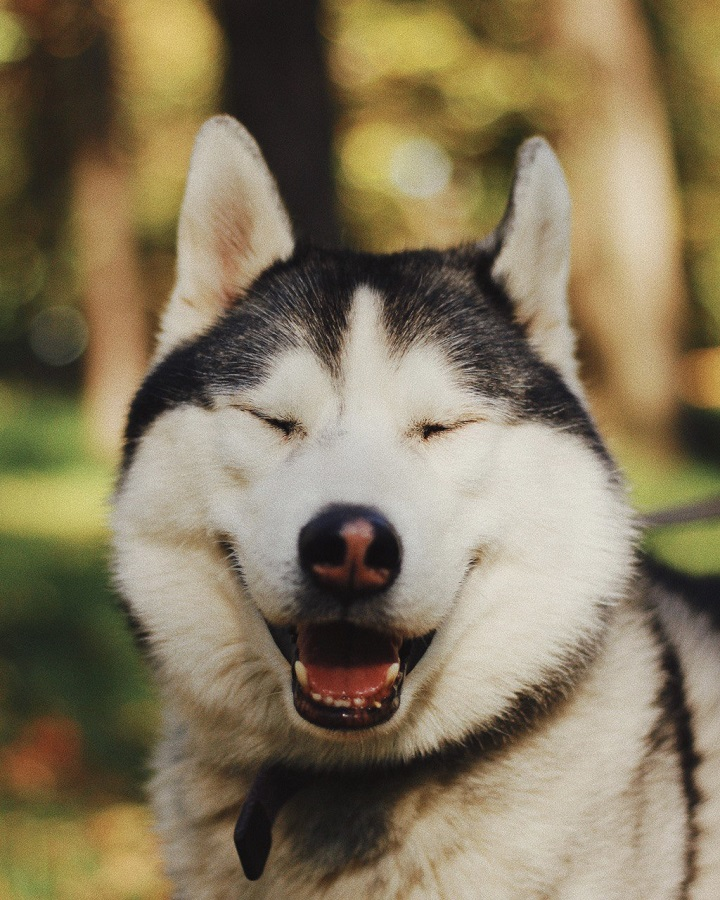

In [4]:
path = 'happy-dog.jpg'
image = cv.imread(path)
image = image.astype('float32')


Image(path)

Complete the below function for finding a reduced SVD of a given matrix. (You may use the functions for finding eigenvalues of the matrix). Highlight the key differences between SVD and the reduced version of it.

In [5]:
def reduced_svd(matrix) :
    """
    Input: any matrix
    Returns: tuple of matrix U, array of singular values and matrix V.T
    """
    ATA = np.dot(matrix.T, matrix)
    AAT = np.dot(matrix, matrix.T)
    
    eigenvalues_ATA, eigenvectors_ATA = np.linalg.eigh(ATA)
    eigenvalues_AAT, eigenvectors_AAT = np.linalg.eigh(AAT)
    
    idx_ATA = eigenvalues_ATA.argsort()[::-1]
    idx_AAT = eigenvalues_AAT.argsort()[::-1]
    
    eigenvalues_ATA = eigenvalues_ATA[idx_ATA]
    eigenvectors_ATA = eigenvectors_ATA[:, idx_ATA]
    eigenvectors_AAT = eigenvectors_AAT[:, idx_AAT]
    
    singular_values = np.sqrt(np.maximum(eigenvalues_ATA, 0))
    
    U_matrix = eigenvectors_AAT
    
    V = eigenvectors_ATA
    
    non_zero_idx = np.where(singular_values > 1e-10)[0]  
    U_reduced = U_matrix[:, non_zero_idx]
    singular_values_reduced = singular_values[non_zero_idx]
    V_reduced = V[:, non_zero_idx]
    
    return U_reduced, singular_values_reduced, V_reduced.T

A = np.array([[1, 2, 3, 4],
              [2, 7, 4, 5],
              [3, 4, 3, 8],
              [4, 5, 8, 3]]
             )
U, s, VT = reduced_svd(A)

print(f"Matrix U:\n {U}\n")
print(f"Matrix s:\n {s}\n")
print(f"Matrix VT:\n {VT}")


Matrix U:
 [[-0.30461046 -0.14903379  0.31295055  0.88716591]
 [-0.54242371 -0.07127124 -0.83165076  0.09515223]
 [-0.53433563 -0.64331012  0.35591771 -0.41708524]
 [-0.57225381  0.74757035  0.28938132 -0.17298151]]

Matrix s:
 [17.33847234  5.15839249  2.79573697  0.97581683]

Matrix VT:
 [[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [-0.14903379 -0.07127124 -0.64331012  0.74757035]
 [ 0.31295055 -0.83165076  0.35591771  0.28938132]
 [ 0.88716591  0.09515223 -0.41708524 -0.17298151]]


The reduced $SVD$ basically chops off all the unimportant data: if a matrix $A$ is of rank $r$, it has only $r$ positive singular values. Other are zeros.
Thus, the reduced $SVD$ gets rid of those zero values $\sigma_i$ and corresponding left and right singular vectors that results in $m \times r$ matrix $U$,
$r \times r$ matrix $\Sigma$ and $r \times n$ matrix $V^T$.

Inspite of that, the reduced $SVD$ still returns us the matrix $A$!

Complete the function below. It should output the k-rank approximation of the given image using previously written SVD function. Use the slider to see how the image quality changes as we increase/decrease k.

For simplification, you can convert your image to a grayscale. However, it will be appreciated if you work with RGB channels (it is possible that you'll need to modify the method below a little).

In [6]:
@interact(k_val=widget.IntSlider(min=1, max=np.linalg.matrix_rank(image[:, :, 0]), value=100))
def k_rank_compressed_image(k_val):
    approximated_image = np.zeros_like(image)
    
    k_val = min(k_val, np.linalg.matrix_rank(image[:, :, 0]))
    
    for i in range(3): 
        U_matrix, S, Vt = np.linalg.svd(image[:, :, i].astype(float), full_matrices=True)
        # U_matrix, S, Vt = reduced_svd(image[:, :, i].astype(float))
        approximated_channel = np.dot(U_matrix[:, :k_val], np.dot(np.diag(S[:k_val]), Vt[:k_val, :]))
        approximated_image[:, :, i] = approximated_channel
    
    approximated_image = np.clip(approximated_image, 0, 255)  
    approximated_image = approximated_image.astype('uint8')
    
    plt.figure(figsize=(8, 8))
    plt.imshow(approximated_image)
    plt.title(f'k-rank approximation with k={k_val}')
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=100, description='k_val', max=720, min=1), Output()), _dom_classes=('wid…

In general, compressing the image to 60-80% percent of its original size  lowers its quality but human eye won't be even able to notice it. Therefore, we can win in storage while keeping almost the same image quality. Find out the range of $k$'s which result in keeping only 60-80% of the size of the original image. For what $k$'s there is no reason to use SVD for the sake of reducing storage space?

In [7]:
def compressed_size(k_value, imagine):
    size_comp = 3 * (imagine.shape[0] * k_value + imagine.shape[1] * k_value + k_value) # U (m x k), S (k), V (k x n)
    return size_comp

### Results (1 pt)
Choose some metric for determining how good the compression with SVD is. Experiment with other compression algorithms (DCT, for instance). Compare it with SVD. Be creative;)

In [11]:
# your code here
from math import cos, sqrt, pi


cropped_img = cv.imread("cropped-dog.jpg", cv.IMREAD_GRAYSCALE)

h, w = cropped_img.shape
block_size = 8

num_brows, num_bcols = h // block_size, w // block_size

img_blocks = []
for row in range(num_brows):
    for col in range(num_bcols):
        start_row = row * block_size
        end_row = start_row + block_size
        start_col = col * block_size
        end_col = start_col + block_size
        
        block = cropped_img[start_row:end_row, start_col:end_col]
        img_blocks.append(block)
blocks = np.array(img_blocks)

print(blocks)

[[[ 78  81  82 ...  72  75  73]
  [ 82  72  83 ...  91  77  69]
  [ 73  86  76 ...  73  81  68]
  ...
  [ 83  79  77 ...  79  88  74]
  [ 85  84  71 ...  79  80  67]
  [ 77  76  86 ...  77  82  74]]

 [[ 71  74  69 ...  68  61  63]
  [ 70  75  67 ...  60  64  70]
  [ 77  80  66 ...  62  66  64]
  ...
  [ 70  61  67 ...  73  67  66]
  [ 77  65  62 ...  69  70  66]
  [ 69  62  68 ...  60  69  77]]

 [[ 62  61  65 ...  49  58  50]
  [ 64  62  65 ...  60  56  45]
  [ 66  58  64 ...  65  55  50]
  ...
  [ 63  64  55 ...  55  55  57]
  [ 64  69  60 ...  59  60  49]
  [ 67  53  53 ...  47  52  51]]

 ...

 [[ 39  53  61 ...  91  95 102]
  [ 55  73  82 ...  98 109 126]
  [ 60  94  86 ... 120 119 145]
  ...
  [ 93 103 121 ... 142 147 164]
  [109 121 125 ... 152 146 161]
  [113 124 143 ... 146 146 160]]

 [[131 143 156 ... 176 174 173]
  [142 133 154 ... 152 171 160]
  [133 167 161 ... 174 188 167]
  ...
  [144 158 191 ... 178 189 177]
  [151 175 161 ... 183 166 181]
  [166 163 184 ... 181 193 1

In [12]:
transformed_blocks = []

N = block_size
C, Ct = np.zeros((N, N)), np.zeros((N, N))
for block in blocks:
    # Compose transform matrices for DCT
    for i in range(N):
        for j in range(N):
            if i == 0:
                C[i][j] = 1 / sqrt(N)
            else:
                C[i][j] = sqrt(2/N) * cos( ((2 * j + 1) * i * pi) / (2*N) )

    for i in range(N):
        for j in range(N):
            Ct[i][j] = C[j][i]

    # level-off the block for DCT
    for i in range(N):
        for j in range(N):
            block[i][j] -= 128
    
    transformed_block = np.dot(np.dot(C, block), Ct)
    transformed_blocks.append(transformed_block)

In [14]:
rows = []
for i in range(num_brows):
    row_blocks = transformed_blocks[i*num_bcols : (i+1)*num_bcols]
    row = np.hstack(row_blocks)
    rows.append(row)

output_image = np.vstack(rows)

cv.imshow("Transformed", output_image)
cv.waitKey(0)
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/cheporte/Desktop/Lab_3/venv/lib/python3.11/site-packages/cv2/qt/plugins"


This is a space for your suggestions, comments, threats, etc...